In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install mlxtend: conda install mlxtend --channel conda-forge
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the Ames Housing dataset
df0 = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t')

# Extract specific columns
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']
df = df0.loc[:, columns] # loc: select rows and columns according to their names. iloc uses integer indices.

# Convert the feature values of "Central Air" to integers
df['Central Air']=df['Central Air'].map({'N':0, 'Y':1})

# Drop the example with the missing value
df = df.dropna(axis=0) # axis=0: drop the row that contains the missing value

In [4]:
X = df['Gr Liv Area'].values.reshape(-1,1)
y = df['SalePrice'].values

In [8]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [11]:
# Sort X, return the indices
sort_id = X.flatten().argsort()
X[sort_id]

array([[ 334],
       [ 407],
       [ 438],
       ...,
       [4676],
       [5095],
       [5642]], dtype=int64)

In [12]:
# Visualization of the result
def lin_regplot(X, y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(X, y, color="blue", edgecolor="white")
    ax.plot(X, model.predict(X), color="black")

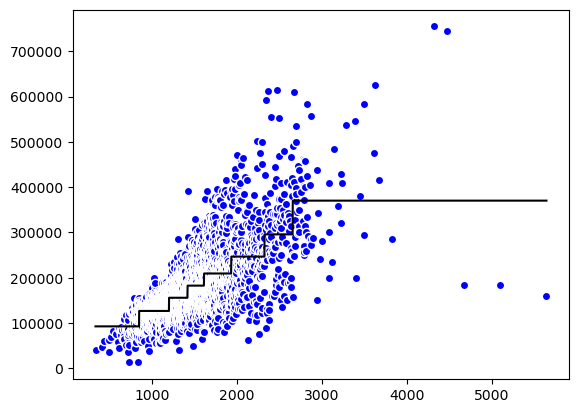

In [13]:
lin_regplot(X[sort_id], y[sort_id], tree)

In [14]:
# Use another feature
X = df['Overall Qual'].values.reshape(-1,1)

In [16]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

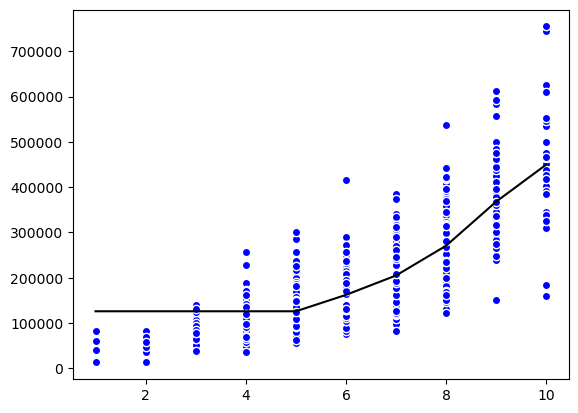

In [17]:
# Sort X, return the indices
sort_id = X.flatten().argsort()
# Visualization
lin_regplot(X[sort_id], y[sort_id], tree)

In [19]:
# Random forest regression

# Extract data
target = 'SalePrice'
features = df.columns[df.columns!=target]
X = df[features].values
y = df[target].values
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# Random forest
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [22]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

MAE train: 8137.714885434256
MAE test: 21633.80851065818


In [23]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_test}')

R2 train: 0.9768061764968589
R2 test: 0.8329069932795194


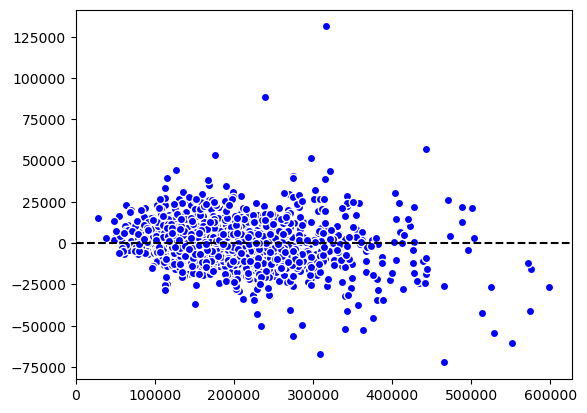

In [27]:
# Residual plot
# For the training data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_train_pred, y_train_pred-y_train, color="blue", edgecolor="white")
ax.axhline(y = 0, color = 'black', linestyle = '--')

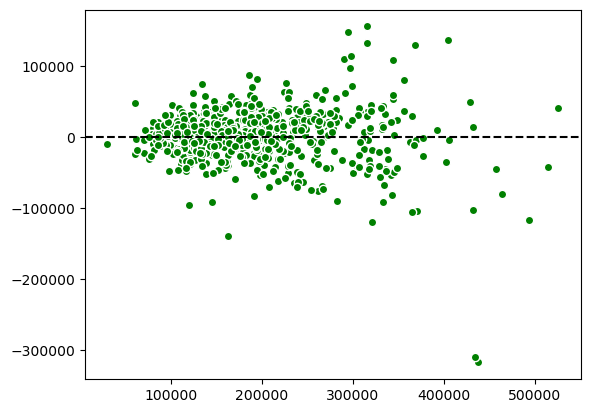

In [29]:
# For the test data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test_pred, y_test_pred-y_test, color="green", edgecolor="white")
ax.axhline(y = 0, color = 'black', linestyle = '--')